In [2]:
import qiskit, sys
import numpy as np, matplotlib.pyplot as plt
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.ansatz, qtm.fubini_study, qtm.encoding

Step: 100%|██████████| 100/100 [00:54<00:00,  1.85it/s]


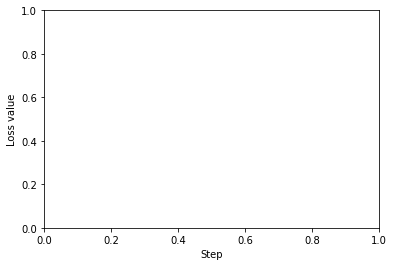

In [8]:
# Init parameters
num_qubits = 3
thetas = np.ones((2*num_qubits*3))
theta = np.random.uniform(0, 2*np.pi)
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.ansatz.create_ghz_state(qc)
# Reduce loss value in 100 steps
thetass_ghz, loss_values_ghz = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.sgd,
    is_return_all_thetas = True,
    verbose = 1
)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [9]:
traces_ghz, fidelities_ghz = [], []
for thetas in thetass_ghz:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.ansatz.create_ghz_state(qc)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    psi_hat = qiskit.quantum_info.Statevector(qtm.base.get_u_hat(
        thetas = thetas, 
        create_circuit_func = qtm.ansatz.u_cluster_nqubit, 
        num_qubits = qc.num_qubits
    ))
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces_ghz.append(trace)
    fidelities_ghz.append(fidelity)

In [10]:
# Plot loss value in 100 steps
np.savetxt("./loss_values_ghz.csv", loss_values_ghz, delimiter=",")
np.savetxt("./thetass_ghz.csv", thetass_ghz, delimiter=",")
np.savetxt("./traces_ghz.csv", traces_ghz, delimiter=",")
np.savetxt("./fidelities_ghz.csv", fidelities_ghz, delimiter=",")


Step: 100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


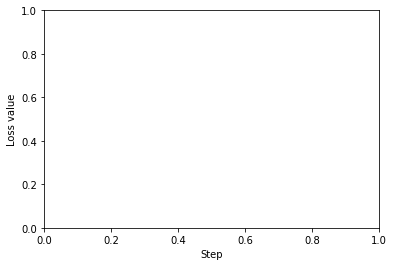

In [12]:
# Init parameters
num_qubits = 3
thetas = np.ones((2*num_qubits*3))
theta = np.random.uniform(0, 2*np.pi)
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.ansatz.create_w_state(qc)
# Reduce loss value in 100 steps
thetass_w, loss_values_w = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.sgd,
    is_return_all_thetas = True,
    verbose = 1
)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [14]:
traces_w, fidelities_w = [], []
for thetas in thetass_w:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.ansatz.create_w_state(qc)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    psi_hat = qiskit.quantum_info.Statevector(qtm.base.get_u_hat(
        thetas = thetas, 
        create_circuit_func = qtm.ansatz.u_cluster_nqubit, 
        num_qubits = qc.num_qubits
    ))
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces_w.append(trace)
    fidelities_w.append(fidelity)

In [15]:
# Plot loss value in 100 steps
np.savetxt("./loss_values_w.csv", loss_values_w, delimiter=",")
np.savetxt("./thetass_w.csv", thetass_w, delimiter=",")
np.savetxt("./traces_w.csv", traces_w, delimiter=",")
np.savetxt("./fidelities_w.csv", fidelities_w, delimiter=",")


Step: 100%|██████████| 100/100 [01:43<00:00,  1.03s/it]


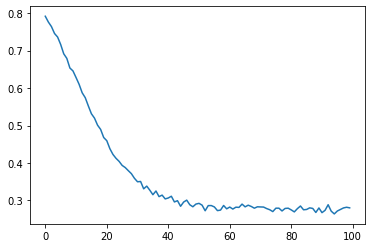

In [25]:
thetas = np.ones(num_qubits*5)
# For determine random state
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')
qc = encoder.qcircuit

qc.add_register(qiskit.ClassicalRegister(encoder.num_qubits))
thetass_haar, loss_values_haar = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.sgd,
    verbose = 1,
    is_return_all_thetas = True
)

plt.plot(loss_values_haar)

In [26]:
traces_haar, fidelities_haar = [], []
for thetas in thetass_haar:
    # Get |psi> = U_gen|000...>
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    psi_hat = qiskit.quantum_info.Statevector(qtm.base.get_u_hat(
        thetas = thetas, 
        create_circuit_func = qtm.ansatz.u_cluster_nqubit, 
        num_qubits = qc.num_qubits
    ))
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces_haar.append(trace)
    fidelities_haar.append(fidelity)

In [27]:
# Plot loss value in 100 steps
np.savetxt("./loss_values_haar.csv", loss_values_haar, delimiter=",")
np.savetxt("./thetass_haar.csv", thetass_haar, delimiter=",")
np.savetxt("./traces_haar.csv", traces_haar, delimiter=",")
np.savetxt("./fidelities_haar.csv", fidelities_haar, delimiter=",")


In [4]:
import pandas as pd
fidelities_ghz = pd.read_csv("./fidelities_ghz.csv", sep=",", header=None)
fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

fidelities_w = pd.read_csv("./fidelities_w.csv", sep=",", header=None)
fidelities_w = fidelities_w.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

fidelities_haar = pd.read_csv("./fidelities_haar.csv", sep=",", header=None)
fidelities_haar = fidelities_haar.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

traces_ghz = pd.read_csv("./traces_ghz.csv", sep=",", header=None)
traces_w = pd.read_csv("./traces_w.csv", sep=",", header=None)
traces_haar = pd.read_csv("./traces_haar.csv", sep=",", header=None)


C:\Users\haime\AppData\Local\Temp/ipykernel_16328/4105757055.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
C:\Users\haime\AppData\Local\Temp/ipykernel_16328/4105757055.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidel

C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


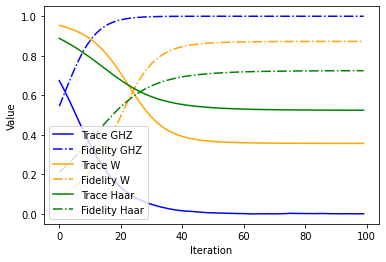

In [6]:
plt.plot(traces_ghz, label = 'Trace GHZ', color = 'blue')
plt.plot(fidelities_ghz, label = 'Fidelity GHZ', linestyle = '-.', color = 'blue')
plt.plot(traces_w, label = 'Trace W', color = 'orange')
plt.plot(fidelities_w, label = 'Fidelity W', linestyle = '-.', color = 'orange')
plt.plot(traces_haar, label = 'Trace Haar', color = 'g')
plt.plot(fidelities_haar, label = 'Fidelity Haar', linestyle = '-.', color = 'g')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.savefig('compare_initstate.eps', format='eps', dpi=600)
plt.show()


C:\Users\haime\AppData\Local\Temp/ipykernel_16248/1338845867.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
C:\Users\haime\AppData\Local\Temp/ipykernel_16248/1338845867.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidel

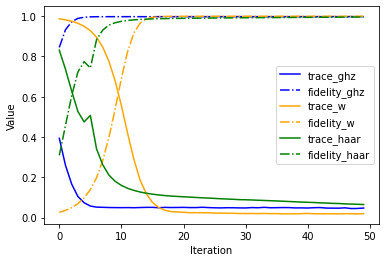

In [15]:
import pandas as pd
fidelities_ghz = pd.read_csv("../../experiments/compare_initstate/fidelities_ghz.csv", sep=",", header=None)
fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

fidelities_w = pd.read_csv("../../experiments/compare_initstate/fidelities_w.csv", sep=",", header=None)
fidelities_w = fidelities_w.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

fidelities_haar = pd.read_csv("../../experiments/compare_initstate/fidelities_haar.csv", sep=",", header=None)
fidelities_haar = fidelities_haar.applymap(lambda s: np.complex(s.replace('i', 'j'))).values

traces_ghz = pd.read_csv("../../experiments/compare_initstate/traces_ghz.csv", sep=",", header=None)

traces_w = pd.read_csv("../../experiments/compare_initstate/traces_w.csv", sep=",", header=None)

traces_haar = pd.read_csv("../../experiments/compare_initstate/traces_haar.csv", sep=",", header=None)


plt.plot(traces_ghz[:50], label = 'trace_ghz', color = 'blue')
plt.plot(fidelities_ghz[:50], label = 'fidelity_ghz', linestyle = '-.', color = 'blue')
plt.plot(traces_w[:50], label = 'trace_w', color = 'orange')
plt.plot(fidelities_w[:50], label = 'fidelity_w', linestyle = '-.', color = 'orange')
plt.plot(traces_haar[:50], label = 'trace_haar', color = 'g')
plt.plot(fidelities_haar[:50], label = 'fidelity_haar', linestyle = '-.', color = 'g')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.savefig('Compare_init_state_trace_fidelity.png', format='png', dpi=600)
plt.show()
